## Tarea Final: Teoría de Decisiones y Complejidad en Ciencias Sociales.

Eduardo Carrasco Vidal

Estudiante de Doctorado en Ingeniería de Sistemas Complejos.

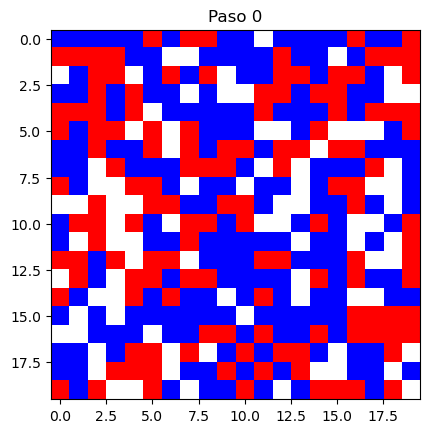

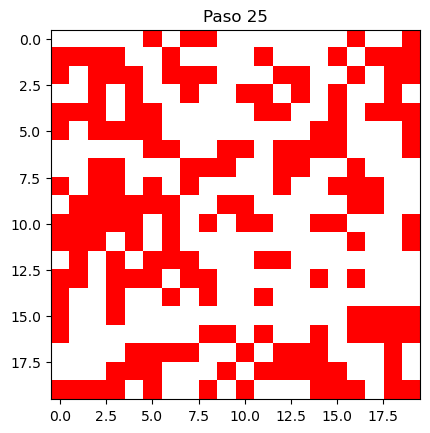

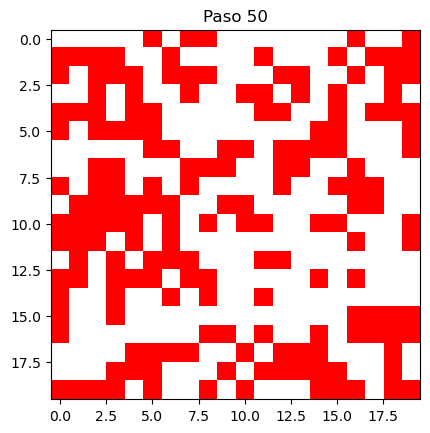

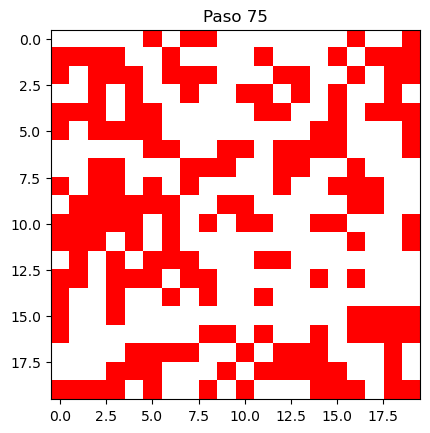

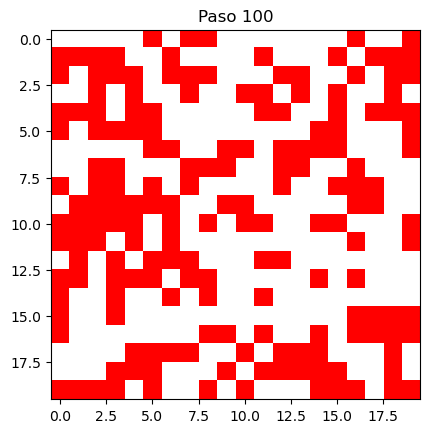

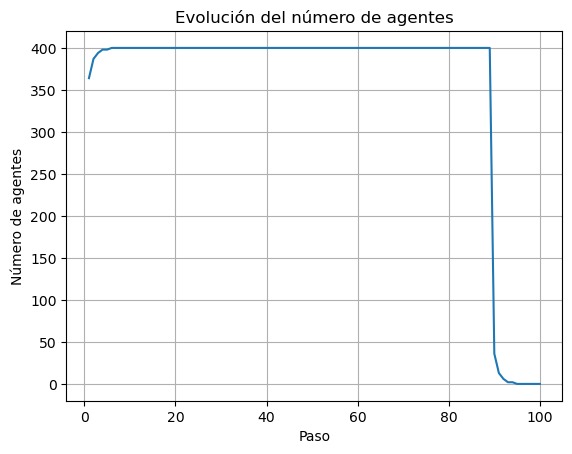

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['white', 'blue', 'red'])

# Inicializar grilla y azúcar
def inicializar_grilla(n, p):
    grilla = np.random.choice([0, 1, 2], size=(n, n), p=p)
    return grilla

# Inicializar agentes
def inicializar_agentes(grilla):
    agentes = {}
    for x in range(n):
        for y in range(n):
            if grilla[x, y] != 0:
                agentes[(x, y)] = {'azucar': random.randint(10, 30), 'edad': 0}
    return agentes

# Envejecer y matar agentes
def envejecer_y_matar_agentes(agentes, umbral_edad):
    for pos in list(agentes.keys()):
        agentes[pos]['edad'] += 1
        if agentes[pos]['edad'] >= umbral_edad:
            del agentes[pos]
            
# Mover agentes
def mover_agentes(grilla, agentes):
    for pos in list(agentes.keys()):
        x, y = pos
        dx, dy = random.choice([(-1, 0), (1, 0), (0, -1), (0, 1)])
        nx, ny = (x + dx) % n, (y + dy) % n
        if grilla[nx, ny] == 0:
            grilla[nx, ny] = grilla[x, y]
            grilla[x, y] = 0
            agentes[(nx, ny)] = agentes.pop((x, y))

# Reproducir agentes
def reproducir_agentes(grilla, agentes, azucar_minima):
    for pos in list(agentes.keys()):
        x, y = pos
        if agentes[pos]['azucar'] >= azucar_minima:
            dx, dy = random.choice([(-1, 0), (1, 0), (0, -1), (0, 1)])
            nx, ny = (x + dx) % n, (y + dy) % n
            if grilla[nx, ny] == 0:
                grilla[nx, ny] = grilla[x, y]
                agentes[(nx, ny)] = {'azucar': random.randint(10, 30), 'edad': 0}

# Calcular métricas (por ejemplo, número de agentes)
def calcular_metricas(agentes):
    return len(agentes)

# Parámetros
umbral_edad = 90
n = 20  # Tamaño de la grilla
p = [0.2, 0.4, 0.4]  # Probabilidades de celdas vacías, agentes tipo 1 y tipo 2
azucar_minima = 10  # Azúcar mínima para reproducirse
pasos = 100  # Número de pasos de tiempo

# Inicialización
grilla = inicializar_grilla(n, p)
agentes = inicializar_agentes(grilla)
metricas = []

# Visualización inicial
plt.imshow(grilla, cmap=cmap)
plt.title('Paso 0')
plt.show()

# Simulación
for t in range(1, pasos + 1):
    mover_agentes(grilla, agentes)
    reproducir_agentes(grilla, agentes, azucar_minima)
    envejecer_y_matar_agentes(agentes, umbral_edad)  # Nueva función
    metricas.append(calcular_metricas(agentes))
    
    # Visualización de la grilla cada 10 pasos
    if t % 25 == 0:
        plt.imshow(grilla, cmap=cmap)
        plt.title(f'Paso {t}')
        plt.show()

# Gráfico de métricas
plt.plot(range(1, pasos + 1), metricas)
plt.xlabel('Paso')
plt.ylabel('Número de agentes')
plt.title('Evolución del número de agentes')
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Inicializar agentes con azúcar aleatorio entre 5 y 25
agentes = {'agente_{}'.format(i): random.randint(5, 25) for i in range(100)}

# Mostrar la distribución de la riqueza
plt.hist(agentes.values(), bins=range(5, 26), alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución inicial de la riqueza (azúcar)')
plt.xlabel('Azúcar')
plt.ylabel('Número de agentes')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap

# Inicializar grilla y azúcar
def inicializar_grilla(n, p):
    grilla = np.random.choice([0, 1, 2], size=(n, n), p=p)
    azucar = np.random.randint(0, 5, size=(n, n))
    return grilla, azucar

# Inicializar agentes
def inicializar_agentes(grilla):
    agentes = {}
    for x in range(n):
        for y in range(n):
            if grilla[x, y] != 0:
                agentes[(x, y)] = {'azucar': random.randint(5, 25), 'edad': 0}
    return agentes

# Envejecer y matar agentes
def envejecer_y_matar_agentes(agentes, umbral_edad):
    for pos in list(agentes.keys()):
        agentes[pos]['edad'] += 1
        if agentes[pos]['edad'] >= umbral_edad:
            del agentes[pos]

# Mover agentes y actualizar azúcar
def mover_agentes(grilla, agentes, azucar):
    for pos in list(agentes.keys()):
        x, y = pos
        dx, dy = random.choice([(-1, 0), (1, 0), (0, -1), (0, 1)])
        nx, ny = (x + dx) % n, (y + dy) % n
        if grilla[nx, ny] == 0:
            grilla[nx, ny] = grilla[x, y]
            grilla[x, y] = 0
            agentes[(nx, ny)] = agentes.pop((x, y))
            agentes[(nx, ny)]['azucar'] += azucar[nx, ny] - 1  # Metabolismo

# Reproducir agentes
def reproducir_agentes(grilla, agentes, azucar_minima):
    for pos in list(agentes.keys()):
        x, y = pos
        if agentes[pos]['azucar'] >= azucar_minima:
            vecinos = [(x+dx, y+dy) for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]]
            vecinos = [(nx % n, ny % n) for nx, ny in vecinos]
            for nx, ny in vecinos:
                if grilla[nx, ny] != 0 and grilla[nx, ny] != grilla[x, y]:
                    if agentes.get((nx, ny), {}).get('azucar', 0) >= azucar_minima:
                        hijo = random.choice([1, 2])
                        grilla[nx, ny] = hijo
                        agentes[(nx, ny)] = {'azucar': random.randint(5, 25), 'edad': 0}
                        break

                        
# Calcular métricas (por ejemplo, número de agentes)
def calcular_metricas(agentes):
    return len(agentes)
                        
# Parámetros
umbral_edad = 90
n = 20
p = [0.2, 0.4, 0.4]
azucar_minima = 20
pasos = 100

cmap = ListedColormap(['white', 'blue', 'red'])

# Inicialización
grilla, azucar = inicializar_grilla(n, p)
agentes = inicializar_agentes(grilla)
metricas = []

# Simulación
for t in range(1, pasos + 1):
    mover_agentes(grilla, agentes, azucar)
    reproducir_agentes(grilla, agentes, azucar_minima)
    envejecer_y_matar_agentes(agentes, umbral_edad)

    # Visualización de la grilla cada 25 pasos
    if t % 25 == 0:
        plt.imshow(grilla, cmap=cmap)
        plt.title(f'Paso {t}')
        plt.show()

# Gráfico de métricas
plt.plot(range(1, pasos + 1), metricas)
plt.xlabel('Paso')
plt.ylabel('Número de agentes')
plt.title('Evolución del número de agentes')
plt.grid()
plt.show()